# The Basics of Item Response Theory Using R / Python.
## Baker, F. & Kim, Seock.

Creo este notebook con el propósito de tener mis apuntes directos del libro en el notebook y con los códigos pasádos a Python, para entender *IRT* utilizando python3.

## 1 The item Characteristic Curve

* La escala de habilidad en el libro se escala de -3 a +3 pero, la escala puede exceder esos valores
* La habilidad se entiende como una variable latente designada con la letra griega $\theta$
* La probabilidad se denotará cómo $P(\theta)$
* El gráfico de la probabilidad $P(\theta)$ vs $\theta$ es un gráfico con forma de S (S-shape) este gráfico se conoce como "curva caracterísitca del ítem" o en inglés Item Characteristic Curve (ICC)
* Cada ítem en un test tendrá su propia curva característica.
* Existen dos propiedades-técnicas que se usan para describir la ICC: 1) la difícultad y 2) la discriminación.
* 1) La difícultad hace referencia de donde el ítem funcionará bien, en el rango alto de habilidad o en el rango bajo.
* A mayor difícultad más valor de habilidad tomará el cambio de la curvatura.
* 2) La discriminación hace referencia de si mi ítem es capaz de diferenciar aquellos con habilidad o no.
* En escencia mientras más fuerte sea el cambio de la curva, mejor la discriminación.

### 1.3 Algunas etiquetas de uso común:
* La difícultad se etiquetará como: muy fácil, fácil, medio, difícil, muy difíci.
* La discriminación se etiquetará como: ninguna, baja, moderada, alta, perfecta.

### Procedimientos de un caso ejemplo:

Gráfico de una ICC

In [1]:
# Importar las librerías
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import truncnorm
import numpy as np

In [2]:
# definir la función
def p(theta,bmedium=0,amoderate=1): #bmedium es la difícultad y #amoderate es la discriminación
    p = 1/(1 + np.exp(-amoderate*(theta-bmedium)))
    return p

# Guardar los valores a gráfica, probabilidad y habilidad (theta)
p_list = []
theta_list = [] 
for i in range(-30,31,1):
    p_list.append(p(i/10))
    theta_list.append(i/10)

Text(0.5, 1.0, 'ICC')

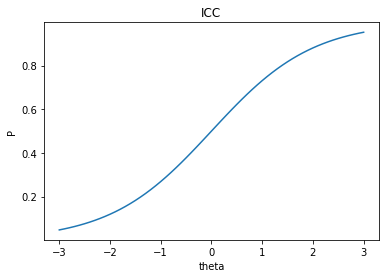

In [3]:
#gráficar
plt.plot(theta_list,p_list)
plt.xlabel("theta")
plt.ylabel("P")
plt.title("ICC")

In [4]:
# Definimo una función para calcular la ICC

def iccplot(b=0,a=1): #B es la discriminación y a es la dificultad.
    p_list = []
    theta_list = [] 
    for i in range(-30,31,1): #Se usa 30 y no 3 ya que range no puede usar floats
        p_list.append(1/(1 + np.exp(-a*(i*0.1-b))))
        theta_list.append(i/10)
    
    plt.plot(theta_list,p_list)
    plt.xlabel("theta")
    plt.ylabel("P")
    plt.title("ICC_plot")

Las definiciones númericas de las etiquetas de difícultad y discriminación son:

|Etiqueta Diff (b)|valor Diff|Etiqueta Disc (a)|Valor disc|
---|---|---|---
|Muy fácil|-2,625|ninguna|0|
|Fácil|-1,5|baja|0,4|
|medio|0|moderada|1|
|Difícil|1,5|alta|2,1|
|Muy Difícil|2,625|perfecta|999|

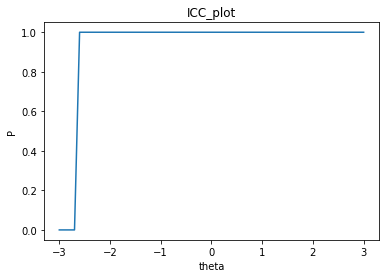

In [5]:
iccplot(-2.625,999) # Para una discriminación perfecta y una difícultad muy fácil.

## Item Chracteristic Curve Models

### 2.2 Modelo de 2 parámetros

* "Bajo la IRT el modelo matemático para la ICC es la función logística acumulada".
* La ecuación para modelo logítico de dos parámetros (difícultad y discriminación) es:

$P(\theta) = \dfrac{1}{1+e^{-L}}=\dfrac{1}{1+e^{-a(\theta-b)}}$

* Dónde
    * $e$ es la función exponencial.
    * $b$ es el parámetro de de la difícultad del ítem.
    * $a$ es el parámetro de la discriminación del ítem.
    * $L=a(\theta - b)$ es el logit.
    * $\theta$ es el nivel de habilidad.

* la difícultad (b) de un ítem tiene su dominio desde $-\infty$ a $+\infty$, en la práctica va -3 a +3.
* la discriminación (a) de un ítem tiene su dominio desde $-\infty$ a $+\infty$, en la práctica va -2,80 a +2,80.

### 2.3 Modelo Rash o de 1 parámetro

* En el modelo Rash se usa $a = 1$ y por tanto la ecuación de probabilidad de obtener un valor de la habilidad es:

$P(\theta) = \dfrac{1}{1+e^{-1(\theta-b)}}$

* Dónde
    * $b$ es el parámetro difícultad.
    * $\theta$ es el nivel de habilidad.

### 2.4 Modelo de 3 parámetros, modelo Birnbaum

* El modelo de Birnbaum (1968) incluye modificaciones al modelo de dos parámetros incluyendo un tercero que corresponde a la probabilidad de advinar la alternativa correcta del ítem (c).

$P(\theta) = c+(1-c)\dfrac{1}{1+e^{-a(\theta-b)}}$

* Dónde:
    * $b$ es el parámetro difícultad.
    * $a$ es el parámetro de discriminación.
    * $c$ es el parámetro de adivinación, su dominio es de 0 a 1, en la práctica no es aceptable valores de $c$ mayores a 0,35 por tanto un dominio aceptable es desde 0 a 0,35.
    * $\theta$ es el nivel de habilidad.

### 2.5 Discriminación negativa

* Un ítem siempre deberá tener una discriminación positiva para la correcta y negativa para las incorrectas.
* Si un ítem presenta discriminación negativa para la correcta implica que hay algo malo con el ítem.

### 2.6 Guías para la interpretación de los valores en los parámetros

|Etiqueta verbal|Rango de valores|Valor típico|
---|---|---
|Ninguno|0|0,00|
|Muy bajo|0,01-0,34|0,18|
|bajo|0,35-0,64|0,50|
|moderado|0,65-1,34|1,00|
|Alto|1,35-1,69|1,50|
|Muy alto|>1,7|2,00|
|Perfecto|$+\infty$|$+\infty$|

In [6]:
def icccal(b,a=1,c=0): #Definición de la función icccal que cálcula los parámetros: L, expnl, opexpnl y P para cualquier a, b yc
    theta = [i*0.1 for i in range(-30,31,1)]
    L = [a*(i-b) for i in theta]
    expnl = [np.exp(-i) for i in L]
    opexpnl = [1 + i for i in expnl]
    P = [c + (1-c)/i for i in opexpnl]
    df = pd.DataFrame(data={"theta":theta,"L":L,"expnl":expnl,"opexpnl":opexpnl,"P":P})
    return df

In [7]:
icccal(-2.625,999)

,theta,L,expnl,opexpnl,P
0,-3.0,-374.625,4.983911e+162,4.983911e+162,2.006456e-163
1,-2.9,-274.725,2.049045e+119,2.049045e+119,4.880322e-120
2,-2.8,-174.825,8.424280e+75,8.424280e+75,1.187045e-76
3,-2.7,-74.925,3.463491e+32,3.463491e+32,2.887260e-33
4,-2.6,24.975,1.423952e-11,1.000000e+00,1.000000e+00
...,...,...,...,...,...
56,2.6,5219.775,0.000000e+00,1.000000e+00,1.000000e+00
57,2.7,5319.675,0.000000e+00,1.000000e+00,1.000000e+00
58,2.8,5419.575,0.000000e+00,1.000000e+00,1.000000e+00
59,2.9,5519.475,0.000000e+00,1.000000e+00,1.000000e+00


In [8]:
def icc(b, a=1, c=0):
    plt.xlabel("theta")
    plt.ylabel("P")
    plt.title("ICC_plot")
    plt.plot(icccal(b,a,c)["theta"],icccal(b,a,c)["P"])

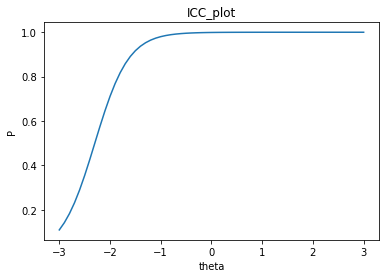

In [9]:
icc(-2.3,3)

## Estimating Item Parameters

* Para estimar los parámetros a,b,c de un ítem será necesario utlizar el procedimiento "Maximum likelihood estimation" MLE.
* "la concordancia de las proporciones observadas de respuestas correctas y las que produce la ICC ajustada para un ítem se mide mediante el "índice de bondad de ajuste Chi-cuadrado".
* Fórmula:

$\chi^2=\sum_{g=1}^G f_g\dfrac{[p(\theta_g)-P(\theta_g)]^2}{P(\theta_g)Q(\theta_g)}$

* Dónde
    * G es el número total de grupos.
    * $f_g$ es número total de integrantes en el grupo $g$.
    * $p(\theta_g)$ es la proporción de sujetos que respondieron bien respecto del total del grupo $g$, se expresa como: $p(\theta_g) = \frac{r_g}{f_g}$
    * $P(\theta_g)$ es la probabilidad del grupo $g$ de responder correctamente para el grupo $g$.
    * $Q(\theta_g)$ es la probabiilidad del grupo $g$ de no responder correctamente $Q(\theta_g) = 1 - P(\theta_g)$

* Si el Chi-cuadrado tiene un valor mayor que un valor de criterio ($\chi^2 > \chi^2_{critico}$), entonces la curva no se aproxima a los datos, esto puede ser por dos motivos:
    1) Una curva no adecuada para el ítem fue usada, en ese caso bastará con cambiar de un modelor, ej. Rash a otro por ej. 3P.
    2) Que los datos estén tan dispersos que no permiten ajustar ninguna curva.
* La mayor parte de las veces se da el motivo 2).

### 3.4 The group invariance of item parameters

* Una de las cosas interesantes del IRT es que los parámetros del ítem no dependen del nivel de habilidad de los examinados. Por ello los parámetros de un ítem se conocen como un "grupo invariante".
* A diferencia de la teoría clásica donde los parámetros del ítem si varían respecto de la habilidad de los examinados.
* Para la IRT la distribución de los examinados respecto de la habilidad no es importante para sus parámetros.

#### Actividad 1.

In [10]:
# El siguientes líneas ejecutan la proporción observada de respuestas correctas para cada 33 puntajes de habilidad basados en el modelo ICC.

theta = [i/10000 for i in range(-30000,30001,1875)] #Valores de habilidad.
f = 21 #tamaño de cada grupo. 
G = len(theta) #número total de grupos.

In [11]:
# Definir la función runif de R en python:

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

La función `get_truncated_normal` es una función que se crea para poder generar número aleatorios según una distribución normal definiendo la media, desviación estándar, valor mínimo y valor máximo de la distribución.

In [12]:
# Determinamos los parámetros 

wb = round(get_truncated_normal(0,1,-3,3).rvs(),2)
wa = round(get_truncated_normal(0,1,0.2,2.8).rvs(),2)
wc = round(get_truncated_normal(0,1,0,.35).rvs(),2)

#especificamos el valor de mdl
mdl = 2

#establecemos valores de wc y wa según mdl:
if mdl == 1 | mdl == 2:
    wc = 0
if mdl == 1:
    wa = 1

#generamos las probabilidades según la habilidad
P = [wc + (1-wc)/(1+np.exp(-wa*(i-wb))) for i in theta]

#Obtenemos un valor aleatorio p para cada probabilidad p(theta_g) = r_g / f, donde r_g número de personas que acertaron la correcta sobre el total f.
p = np.random.binomial(f,P,len(theta))/f

`p` es $p(\theta_g) = \dfrac{r_g}{f_g}$ donde $r_g$ es la cantidad de sujetos del grupo g que acertaron la correcta y $f_g$ es la cantidad total del grupo. En este caso, $r_g$ lo generamos de forma aleatoria a partir de una distribución binomial y puede tomar valores de $0$ a $f_g$, en este caso $f_g$ es 21 que es el tamaño de cada grupo. 

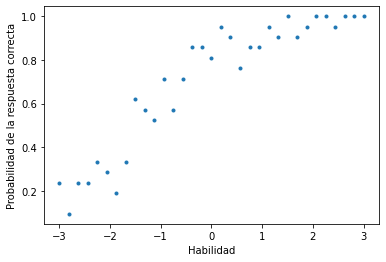

In [13]:
plt.plot(theta,p, marker='.', linestyle='none')
plt.xlabel("Habilidad")
plt.ylabel("Probabilidad de la respuesta correcta")
plt.show()

#### Actividad 2.

Determinando el valor de $\chi^2$

In [14]:
# Cálculo de Chi-cuadrado
cs = 0
for i in range(0,len(theta),1):
    v = f*pow(p[i]-P[i],2)/(P[i]-pow(P[i],2))
    cs = cs + v

In [15]:
round(cs,2)

43.7

Como se puede observar el valor de $\chi^2 = 62.57$ cuando se consulta el valor de chi-cuadrado para 32 grado de libertad (n-1 = 33 - 1 = 32) es $\chi^2(32) = 46.2$, por tanto se cumple que: $\chi^2 > \chi^2_{critico}$; 62.7 > 46.2. Por tanto podemos decir que nuestros datos simulados si se ajustan al modelo IRT.

Los grados de libertad por modelo son: (Baker F. pág 45)
* k-1 para modelo Rash.
* k-1-1 para el modelo de 2 parámetros
* k-1-2 para el modelo de 3 parámtros.

#### Procedimiento para un ejemplo que ilustra la invariancia de grupo

In [16]:
t1l = -3 #valor menor de theta
t1u = -1 #valor mayor de theta
lower1g = 0 #grupo más bajo


## La curva característica de la prueba

* En las pruebas objetivas el puntaje de la prueba que obtiene un estudiantes es la suma de las preguntas correctas, por tanto el puntaje es un valor entero que va desde 0 hasta J siendo J el número de total de respuestas correctas.
* Si el mismo sujeto toma la prueba nuevamente podría obetener otro puntaje, y así susesivamente. Es de esperar que todos los puntajes del test obtenidos por el sujeto ronden un valor promedio.
* Ese valor promedio se denomina True Score, o Puntaje Verdadero.
* El true score varía según la teória de la medición que se use, en IRT la definición es la dada por D.N. Lawley.

### True Score

* La fórmula del true score es:

$TS_i = \sum^J_{j=1}P_j(\theta_i)$

Dónde
* $TS_i$ es el true score para el examinado i con habilidad $\theta_i$
* $j$ es el ítem y $J$ es el número total de ítems del exámen.
* $P_j(\theta_i)$ depende del modelo de ICC usado.

#### Sesiones de comuptador

In [17]:
b = [-1,.75,0,.5] #La prueba tiene 4 ítems y esos son los valores de la dificultad de cada uno en orden
a = [.5, 1.2, .8, .75] #La prueba tiene 4 ítems y esos son los valores de la discriminación de cada uno en orden
theta = [i/10 for i in range(-30,30,1)] #valores de habilidad
J = len(b)
TS = []
for i in theta:
    ts = 0
    for j in range(0,J):
        P = 1/(1+np.exp(-a[j]*(i-b[j])))
        ts = ts+P
    TS.append(ts)

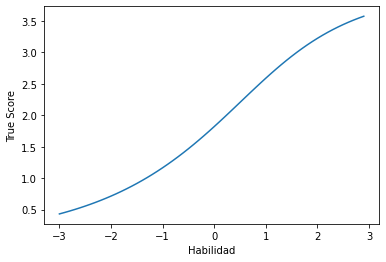

In [18]:
plt.plot(theta,TS)
plt.xlabel("Habilidad")
plt.ylabel("True Score")
plt.show()

Es importante recordar que los ejemplo utilizados aquí la habilidad está arbitrariamente restringida su dominio de -3 a 3 pero en la realidad es de $-\infty$ a $+\infty$

## Estimando la habilidad de los examinados.

* el primer propósito de aplicar un test a un estudiante es para ubicarlo en la escala de habilidad.
* Si logramos esto, conseguimos dos objetivos:
    * Podemos evaluar al sujeto según su nivel de habilidad latente.
    * Podremos comparar sujetos.
* Las respuestas de un estudiante a los ítems de una prueba, serán puntuados como 1 o 0, la lista de 1nos y 0ros se conoce como "vector de respuestas del estudiante" (examinee's item response vector)

#### Procedimientos de estimación de la habilidad

* Bajo la IRT, los procedimientos de máxima probabilidad son usados para estimar la habilidad de un estudiante.
* La ecuación para estimar la habilidad en modelo de dos parámetros es:

$\hat{\theta}_{S+1}=\hat{\theta}_S-\dfrac{\sum^{J}_{j=1}a_j[u_j-P_j(\hat{\theta}_S)]}{-\sum^{J}_{j=1}a_j^2P_j(\hat{\theta}_S)Q_j(\hat{\theta}_S)}$

* Dónde:
    * $\hat{\theta}_S$ es provisiorio, estimación de la habilidad del estudiante en la iteración S.
    * $a_j$ es la discriminación del ítem j.
    * $u_j$ es la respuesta del el estudianteal ítem j, dónde: $u_j = 1$ si es correcta y $u_j = 0$ si es incorrecta.
    * $P_j(\hat{\theta}_S)$ es la probabilidad de responder correctamente el ítem j bajo ICC dada, un nivel de habilidad $\hat{\theta}_S$ en la iteración S.
    * $Q_j(\hat{\theta}_S)=1-P_j(\hat{\theta}_S)$ es la probabilidad de que el estudiante responda incorrectamente en una ICC dada para una habilidad $\hat{\theta}_S$ en la iteración S.

* La ecuación anterior se interpreta así:
    * Incialmente $\hat{\theta}_S$ toma un valor arbitrario, ej: 1.
    * La probabilidad correctamente se calcula para la ICC dada con los parámetros a y b ya conocidos.
    * La fracción dada es el término de ajuste de $\hat{\theta}_S$, ese término de ajuste se conoce como $\Delta\hat{\theta}_S$ y la ecuación anterior se puede denotar como $\hat{\theta}_{S+1}=\hat{\theta}_S - \Delta\hat{\theta}_S$
    * El término $\hat{\theta}_{S+1}$ es obtenido de la resta de la habilidad arbitraria menos el término de ajuste.
    * En la siguiente iteración $\hat{\theta}_{S+1}$ se vuelve $\hat{\theta}_{S}
    * Finalmente el valor al final de la iteración de $\hat{\theta}_{S+1}$ será comprendido como la "habilidad estimada del estudiante".
    * La habilidad del estudiante tendrá la misma métrica que el parámetro de difícultad.
* es importante destacar que nunca conocemos a real habilidad del estudiante, solo se puede estimar, $\hat{\theta}$, pero también podemos el error estándar de esa estimación como una muestra de que tan precisa o no es dicha estimación.
* El error esta¡ándar estimado es:

$SE(\hat{\theta}) = \dfrac{1}{\sqrt{\sum^J_{j=1}a_j^2P_j(\hat{\theta})Q_j({\hat{\theta}})}}$

* Existen solo dos formas en que la estimación de la habilidad falla: 
    1) cuando el estudiante obtiene todas correctas ya que se obtiene una habilidad estimdada, $\hat{\theta} = +\infty$
    2) cuando el estudiante obtiene todas incorrectas, ya que se obtiene una habilidades estimada, $\hat{\theta} = -\infty$

* Por ello es importante detectar esto casos antes de lanzar el computo para que no arroje error, una práctica común es seleccionar al estudiante con un puntaje *
* Otra práctica es asignar puntaje arbitrarios a ambos casos:
    * $-\log{2J}$ Para un vector estudiante de 0's, todo incorrecto.
    * $\log{2J}$ Para un vector estudiante de 1's, todo correcto.

#### La invarianza del ítem de la habilidad estimada de un estudiante.

* Otro principio básico de la IRT es que la habilidad del estudiante es un grupo invariante con respecto a los ítems que se usan para determinarla, bajo dos condiciones:
    1) Los ítems deben medir la misma variable latente
    2) Los valores de todos los parámetros de los ítems deben estar en la misma métrica.

* Finalmente, a esta variance de los parámetros de los ítems y la invarianza de la habilidad, se conocen como *principio de invarianza de la IRT.*

#### Sesión de computador



Determinar la habilidad estimada para tres ítems.

In [19]:
u = [1,0,1] #vector del respuestas del estudiante
b = [-1,0,1] #dificultad de los ítems
a = [1,1.2,.8] #discrciminación de los ítems
th = 0 #valor de la habiidad inicial 0
J = len(b) #Número total de ítems
S = 10 #Número de iteraciones
ccrit = 0.001 #valor crítico de error estándar
for s in range(0,S,1):
    sumnum = 0
    sumdem = 0
    for j in range(0,J):
        phat = 1 / (1+np.exp(-a[j]*(th-b[j]))) #Probabilidad de la habilidad
        sumnum = sumnum + a[j]*(u[j]-phat) #denominador del término de ajuste
        sumdem = sumdem - a[j]**2*phat*(1-phat) #denominador del término de ajuste
    delta = sumnum / sumdem #término de ajuste
    th = th - delta #habiidad estimada
    if abs(delta) < ccrit or s == S: #Condición de stop de la iteración si el término de ajuste es menor a 0.001 o se alcanzo la iteración 10.
        se = 1/np.sqrt(-sumdem)
        break
print("Habiidad estimada: ",th,"; error estándar: ",se,"; iteraciones realizadas: ",s)

Habiidad estimada:  0.32484627604891997 ; error estándar:  1.2295680433310263 ; iteraciones realizadas:  2


## The information function

* La información en estadística es el inverso de la varianza de algún parámetro en busqueda.
* Entonces la magnitud de información de un parámetro, I es:

$I = \dfrac{1}{\sigma^2}$

* La cantidad de información también es un grupo invariante, por tanto no depende de la distribución de los examinados.
* La información es una función sobre la habilidad con un único máximo global, en la práctica.

### Función de información del test

* La magnitud de información de un test es:

$I(\theta) = \sum^J_{j=1}I_j(\theta)$

Dónde:
* $I(\theta)$ Es la cantidad de información del test para una habilidad $\theta$
* $I_j(\theta)$ Es la cantidad de información del ítem j para una habilidad $\theta$
* $J$ es la cantidad de ítems en el test

* La Información que tenemos de un test es mucho más precisa que la que tenemos de un ítem
* Una conclusión obvia de la ecuación anterior es que mientras más ítems tenga un test más información.

### Definición de información del ítem

* Depende del modelo de la ICC es la definición de información de ítem que usarémos.
* Para una ICC de dos parámetros la cantidad de información se define:

#### Módelo de dos parámetros.

$I_j(\theta) = a_j^2P_j(\theta)Q_j(\theta)$

Dónde
* $a_j$ es el parámetro de discriminación del ítem $j$.
* $P_j(\theta) = 1/[1+\exp(-L_j)]$
* $L_j = a_j(\theta-b_j)$
* $Q_j(\theta) = 1 - P_j(\theta)$
* $\theta$ es la habilidad de interés.

#### Módelo Rasch

* La cantidad de información del ítem en el modelo Rash es:

$I_j(\theta) = P_j(\theta)Q_j(\theta)$

* Como se puede notar es la misma que para dos parámetros ya que $a_j = 1$

#### Para el módelo de tres parámetros

* La cantidad de información para un ítem bajo el módelo de tres parámetros es:

$I_j(\theta) = a_j^2 \dfrac{Q_j(\theta)}{P_j(\theta)} \dfrac{(P_j(\theta)-c_j)^2}{(1-c_j)^2}$

Dónde:
* $P_j(\theta) = c_j + (1-c_j) \times 1/[1+\exp(-L_j)]$
* $L_j = a_j(\theta - b_j)$
* $Q_j(\theta) = 1 - P_j(\theta)$
 
* Dada los tres modelos de podemos decir que para los mismo parámetros la cantidad de información para el modelo de tres parámetros es menor que para dos y que para el modelo Rasch.

* El error estándar de la habilidad $\theta$ en función de la cantidad de información es:

$SE(\theta)=\dfrac{1}{\sqrt{I(\theta)}}$

In [20]:
len(b)

3

In [21]:
b = [-.4,-.3,-.2,-.1,0,0,.1,.2,.3,.4]
a = [1,1.5,1.2,1.3,1,1.6,1.6,1.4,1.1,1.7]
theta = [i/10 for i in range(-30,30,1)]

J = len(b)
I = []
for t in theta:
    i = 0
    for k in range(0,len(a),1):
        L = a[k]*(t-b[k])
        P = 1/(1+np.exp(-L))
        ii = a[k]**2*P*(1-P)
        i=+ii
    I.append(i)

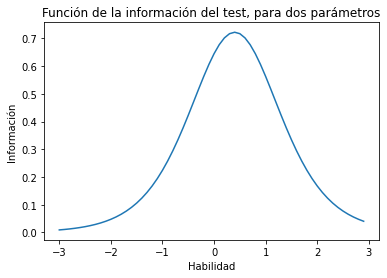

In [22]:
plt.plot(theta, I)
plt.xlabel("Habilidad")
plt.ylabel("Información")
plt.title("Función de la información del test, para dos parámetros")
plt.show()

* Se debe hacer un loop sobre todos los ítems para una misma habilidad, una vez calculada la sumatoria de la información para todos los ítems, se pasa a la siguiente habilidad.

In [23]:
b = [-.4,-.3,-.2,-.1,0,0,.1,.2,.3,.4]
a = [1,1.5,1.2,1.3,1,1.6,1.6,1.4,1.1,1.7]
c = [.2]*10
theta = [i/10 for i in range(-30,30,1)]

J = len(b)
I = []
for t in theta:
    i = 0
    for k in range(0,J,1):
        L = a[k]*(t-b[k])
        P = c[k]+(1-c[k])*1/(1+np.exp(-L))
        Q = 1 - P
        ii = a[k]**2*(Q/P)*(((P-c[k])**2)/(1-c[k])**2)
        i=+ii
    I.append(i)

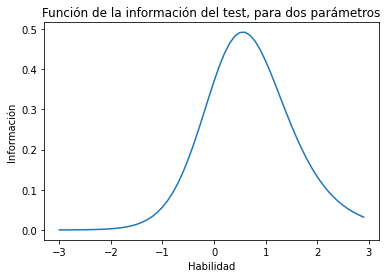

In [24]:
plt.plot(theta, I)
plt.xlabel("Habilidad")
plt.ylabel("Información")
plt.title("Función de la información del test, para dos parámetros")
plt.show()

* Como se puede observar la magnitud de la información del test es menor utilizando el modelo de tres parámetros.

## Calibración del test

* Como bien sabemos cuando construimos y aplicamos un test no tenemos información de ningún parámetro de los ítems ni de la habilidad de los examinados, es por ello que es importantísimo definir una escala en la cual serán estimados estos parámetros.
* Este procedimiento se llama "Calibración del test" y consiste en aplicar el test a N examinados.
* Los valores estimados para los parámetros de los ítems y las habilidades estimadas para los examinados son expresadas en esta métrica.

###  El proceso de la calibración del test

* El paradigma de Birnbaum ofrece un modelo de estimación de una métrica para la habilidad y los parámetros del ítem, este método posee dos fases:
    * en la primera de ellas se estiman valores para los parámetros de los J ítems
    * en la segunda fase se estiman las habilidades para los N examinados.
* Uno de los problemas es que cada vez que se hacen los pasos 1 y 2 se obtienen métricas diferentes para la habilidad, pero eso no es problema ya que en consecutivas iteraciones de las fases 1 y 2 eventualmente se llegará a un valor estable de métrica.

### La calibración del test en el módelo Rasch

* Para la calibración se espera poder usar en los diferentes indivios con idéntico número de respuestas correctas e incorrectas y que están vayan moviendose de un ítem a otro.

### Sesión de computadora

* Primero que todo se cargaran los datos de los examinados, la tabla consiste en todos los ítems del test, 10 y como le fue cada uno de los 16 examinados y el puntaje total que obtuvo en el test (raw_score)

In [94]:
dset1 = pd.DataFrame(np.array( 
                        [[1,0,0,1,0,0,0,0,1,0,0,2],
                        [2,1,0,1,0,0,0,0,0,0,0,2],
                        [3,1,1,1,0,1,0,1,0,0,0,5],
                        [4,1,1,1,0,1,0,0,0,0,0,4],
                        [5,0,0,0,0,1,0,0,0,0,0,1],
                        [6,1,1,0,1,0,0,0,0,0,0,3],
                        [7,1,0,0,0,0,1,1,1,0,0,4],
                        [8,1,0,0,0,1,1,0,0,1,0,4],
                        [9,1,0,1,0,0,1,0,0,1,0,4],
                        [10,1,0,0,0,1,0,0,0,1,0,3],
                        [11,1,1,0,1,1,1,1,1,1,1,9],
                        [12,1,1,1,1,1,1,1,1,1,0,9],
                        [13,1,1,1,0,1,0,1,0,0,1,6],
                        [14,1,1,1,1,1,1,1,1,1,0,9],
                        [15,1,1,0,1,1,1,1,1,1,1,9],
                        [16,1,1,1,1,1,1,1,1,1,1,10]]
                        ), columns = ["Examinee","i1","i2","i3","i4","i5","i6","i7","i8","i9","i10","raw_score"]
)

In [95]:
dset1

,Examinee,i1,i2,i3,i4,i5,i6,i7,i8,i9,i10,raw_score
0,1,0,0,1,0,0,0,0,1,0,0,2
1,2,1,0,1,0,0,0,0,0,0,0,2
2,3,1,1,1,0,1,0,1,0,0,0,5
3,4,1,1,1,0,1,0,0,0,0,0,4
4,5,0,0,0,0,1,0,0,0,0,0,1
5,6,1,1,0,1,0,0,0,0,0,0,3
6,7,1,0,0,0,0,1,1,1,0,0,4
7,8,1,0,0,0,1,1,0,0,1,0,4
8,9,1,0,1,0,0,1,0,0,1,0,4
9,10,1,0,0,0,1,0,0,0,1,0,3


El método Birnbaum para determinar la escala utiliza algunas modificaciones a la base de datos:
1. Asume que todos los sujetos que poseen el mismo puntaje bruto `raw_score` posee la misma $\theta$ por tanto en lugar de tomar todos los puntajes de los sujetos solamente tratará a los sujetos que tengan el mismo puntaje como uno solo amplificado por la frecuencia.
2. Además tomará la suma de cada uno de los puntajes totales de los ítems. Finalmente con esos dos vectores se trabajará para determiar la métrica.

Considerando los puntos 1 y 2 se utilizan dos vectores:
1. El vector frecuecnia por cada uno de los puntajes posibles y calculables (ignorando los puntajes extremos) del instrumento, `f`.
2. El vector de aciertos por cada ítem, `s`.

In [29]:
s = dset1_fix.sum()[1:-1]

In [30]:
f = [dset1_fix[dset1_fix["raw_score"] == i].raw_score.count() for i in range(1,J)]

In [31]:
# definimos:
convb = 0.01
convt = 0.01
convabd = 0.01
K = 26 #número de iteraciones de todo el ciclo +1.
T = 11 #  
G = len(f) #Número total del vector f
J = len(s) #Número de ítems en la prueba

In [32]:
# Determinamos un valor inicial de b, donde el punto medio será el promedio de b
b = [np.log((sum(f)-s[j])/s[j]) for j in range(0,J)]
b = [b[j] - np.mean(b) for j in range(0,J)]
oldb = b

In [33]:
# Definimos un vector theta genérico (si se fija el vector solo toma los valores a partir del número de estudiantes, ningún otro dato.)
theta = [np.log((g+1)/(J-(g+1))) for g in range(0,G)]

In [34]:
for k in range(1,K): #ciclos de iteración para acercarse a la mejor métrica
    print("ciclo: k=",k) 
    for j in range(0,J): #iteramos por cada ítem
        for t in range(0,10): #iteración interna para hacercarse al valor de b
            sumfp = 0
            sumfpq = 0
            for g in range(0,G): #iteramos por cada sujeto
                p = 1/(1 + np.exp(-(theta[g]-b[j])))
                sumfp = sumfp + f[g]*p
                sumfpq = sumfpq + f[g]*p*(1-p)
            deltab = (s[j]-sumfp)/sumfpq
            b[j] = b[j] - deltab
            if abs(deltab) < convb:
                break
    b = [bb - np.mean(b) for bb in b]
    for g in range(0,G):
        for t in range(1,11):
            sump = 0
            sumpq = 0
            for j in range(0,J):
                p = 1/(1 + np.exp(-(theta[g]-b[j])))
                sump = sump + p
                sumpq = sumpq - p*(1-p)
                deltat = ((g+1) - sump) / sumpq
            theta[g] = theta[g] - deltat
            if abs(deltat) < convt:
                break
        abd = [abs(b[i] - oldb[i]) for i in range(0,len(b))]
        if sum(abd) < convabd:
            break
        else:
            oldb = b
b = [b[i]*((J-1)/J) for i in range(0,len(b))]

for g in range(0,G):
    for t in range(0,10):
        sump = 0
        sumpq = 0
        for j in range(0,J):
            p = 1 / (1 + np.exp(-(theta[g]- b[j])))
            sump = sump + p
            sumpq = sumpq - p*(1-p)
        deltat = ((g+1) - sump) / sumpq
        theta[g] = theta[g] - deltat
        if abs(deltat) < convt:
            break
theta = [theta[i]*((J-2)/(J-1)) for i in range(0,len(theta))]

print("b=",b,"\n theta=",theta)

ciclo: k= 1
ciclo: k= 2
ciclo: k= 3
ciclo: k= 4
ciclo: k= 5
ciclo: k= 6
ciclo: k= 7
ciclo: k= 8
ciclo: k= 9
ciclo: k= 10
ciclo: k= 11
ciclo: k= 12
ciclo: k= 13
ciclo: k= 14
ciclo: k= 15
ciclo: k= 16
ciclo: k= 17
ciclo: k= 18
ciclo: k= 19
ciclo: k= 20
ciclo: k= 21
ciclo: k= 22
ciclo: k= 23
ciclo: k= 24
ciclo: k= 25
b= [-2.2717898693281415, -0.21752668864485655, -0.21752668864485655, 0.8977655586210163, -0.9183622898126946, 0.13307871929051823, 0.13307871929051823, 0.5008715464117338, 0.13307871929051823, 1.8273322735262445] 
 theta= [-2.3247764386617344, -1.4662948028607707, -0.8824463085850767, -0.4056787274855105, 0.02751206508607192, 0.45593923369947126, 0.9168653204039917, 1.4687041840622908, 2.270796526856714]


In [96]:
dset1 = pd.DataFrame(np.array( 
                        [[1,0,0,1,0,0,0,0,1,0,0,2],
                        [2,1,0,1,0,0,0,0,0,0,0,2],
                        [3,1,1,1,0,1,0,1,0,0,0,5],
                        [4,1,1,1,0,1,0,0,0,0,0,4],
                        [5,0,0,0,0,1,0,0,0,0,0,1],
                        [6,1,1,0,1,0,0,0,0,0,0,3],
                        [7,1,0,0,0,0,1,1,1,0,0,4],
                        [8,1,0,0,0,1,1,0,0,1,0,4],
                        [9,1,0,1,0,0,1,0,0,1,0,4],
                        [10,1,0,0,0,1,0,0,0,1,0,3],
                        [11,1,1,0,1,1,1,1,1,1,1,9],
                        [12,1,1,1,1,1,1,1,1,1,0,9],
                        [13,1,1,1,0,1,0,1,0,0,1,6],
                        [14,1,1,1,1,1,1,1,1,1,0,9],
                        [15,1,1,0,1,1,1,1,1,1,1,9],
                        [16,1,1,1,1,1,1,1,1,1,1,10]]
                        ), columns = ["Examinee","i1","i2","i3","i4","i5","i6","i7","i8","i9","i10","raw_score"]
)

In [97]:
dset2 = pd.DataFrame(np.array(
[
    [1,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1],
    [2,	0,	1,	1,	1,	0,	0,	0,	1,	0,	0,	4],
    [3,	1,	0,	0,	1,	0,	0,	0,	0,	0,	0,	2],
    [4,	1,	1,	1,	0,	0,	0,	1,	0,	0,	1,	5],
    [5,	1,	1,	1,	1,	0,	0,	0,	0,	0,	1,	5],
    [6,	1,	1,	1,	0,	1,	1,	0,	0,	0,	1,	6],
    [7,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	9],
    [8,	1,	1,	1,	0,	1,	1,	1,	0,	0,	0,	6],
    [9,	0,	1,	1,	1,	1,	1,	0,	1,	1,	0,	7],
    [10,	1,	0,	1,	1,	1,	1,	1,	0,	1,	0,	7],
    [11,	1,	1,	1,	1,	1,	0,	0,	1,	0,	1,	7],
    [12,	1,	1,	1,	1,	1,	0,	1,	1,	1,	0,	8],
    [13,	1,	1,	1,	0,	1,	1,	0,	0,	0,	0,	5],
    [14,	1,	1,	1,	0,	1,	1,	1,	1,	1,	1,	9],
    [15,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	10],
    [16,	1,	1,	1,	1,	1,	1,	1,	1,	1,	1,	10]
]), columns=["Examinee","i1","i2","i3","i4","i5","i6","i7","i8","i9","i10","raw_score"])

In [98]:
dset3 = pd.DataFrame(np.array(
	[[1,0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
	[2,1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1],
	[3,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
	[4,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	3],
	[5,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	3],
	[6,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1],
	[7,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	2],
	[8,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	3],
	[9,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	2],
	[10,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	3],
	[11,	1,	1,	1,	0,	0,	1,	0,	0,	1,	0,	5],
	[12,	1,	1,	1,	1,	1,	1,	1,	1,	0,	0,	8],
	[13,	1,	1,	0,	0,	1,	1,	0,	0,	1,	0,	5],
	[14,	1,	1,	1,	1,	1,	1,	1,	1,	0,	0,	8],
	[15,	1,	1,	1,	0,	1,	1,	0,	0,	1,	0,	7],
	[16,	1,	1,	1,	0,	0,	1,	1,	1,	1,	0,	8]]), columns=["Examinee","i1","i2","i3","i4","i5","i6","i7","i8","i9","i10","raw_score"])

In [131]:
#dset es el dataset

#Primero limpiamos el dataset de aquellos examinados que obtuvieron el puntaje máximo y mínimo
dset = dset3

#definiendo el vector sujetos
dset_fix = dset[dset["raw_score"] != dset.shape[1]-2] #quitando los sujetos con 100% de acierto
dset_fix = dset_fix[dset_fix["raw_score"] != 0] #quitando sujetos con 0% de acierto.

#definiendo vector ítem
s = dset_fix.sum()[1:-1] 
s = s[s != dset_fix.shape[0]] #quitando puntajes con 100% de acierto
s = s[s != 0] #quitando puntajes con 0% de acierto.

J = len(s) #Número de ítems en la prueba
f = [dset_fix[dset_fix["raw_score"] == i].raw_score.count() for i in range(1,J)]
convb = 0.01
convt = 0.01
convabd = 0.01
K = 26 #número de iteraciones de todo el ciclo +1.
G = len(f) #Número total del vector f

# Determinamos un valor inicial de b, donde el punto medio será el promedio de b
b = [np.log((sum(f)-s[j])/s[j]) for j in range(0,J)]
b = [b[j] - np.mean(b) for j in range(0,J)]
oldb = b

# Definimos un vector theta genérico (si se fija el vector solo toma los valores a partir del número de estudiantes, ningún otro dato.)
theta = [np.log((g+1)/(J-(g+1))) for g in range(0,G)]

for k in range(1,K): #ciclos de iteración para acercarse a la mejor métrica
    #print("ciclo: k=",k) 
    for j in range(0,J): #iteramos por cada ítem
        for t in range(0,10): #iteración interna para hacercarse al valor de b
            sumfp = 0
            sumfpq = 0
            for g in range(0,G): #iteramos por cada sujeto
                p = 1/(1 + np.exp(-(theta[g]-b[j])))
                sumfp = sumfp + f[g]*p
                sumfpq = sumfpq + f[g]*p*(1-p)
            deltab = (s[j]-sumfp)/sumfpq
            b[j] = b[j] - deltab
            if abs(deltab) < convb:
                break
    b = [bb - np.mean(b) for bb in b]
    for g in range(0,G):
        for t in range(1,11):
            sump = 0
            sumpq = 0
            for j in range(0,J):
                p = 1/(1 + np.exp(-(theta[g]-b[j])))
                sump = sump + p
                sumpq = sumpq - p*(1-p)
                deltat = ((g+1) - sump) / sumpq
            theta[g] = theta[g] - deltat
            if abs(deltat) < convt:
                break
        abd = [abs(b[i] - oldb[i]) for i in range(0,len(b))]
        if sum(abd) < convabd:
            break
        else:
            oldb = b
b = [b[i]*((J-1)/J) for i in range(0,len(b))]

for g in range(0,G):
    for t in range(0,10):
        sump = 0
        sumpq = 0
        for j in range(0,J):
            p = 1 / (1 + np.exp(-(theta[g]- b[j])))
            sump = sump + p
            sumpq = sumpq - p*(1-p)
        deltat = ((g+1) - sump) / sumpq
        theta[g] = theta[g] - deltat
        if abs(deltat) < convt:
            break
theta = [theta[i]*((J-2)/(J-1)) for i in range(0,len(theta))]

In [134]:
b,theta

([-0.26096328673721025,
  -0.6678284100889881,
  0.13859660780178984,
  0.556238588842292,
  -0.6678284100889881,
  -0.26096328673721025,
  1.0241515892065247,
  0.13859660780178984],
 [-1.7593389403688824,
  -1.005997725987688,
  -0.4734791769996866,
  -0.005165668987630946,
  0.46508750661828946,
  1.003428799265144,
  1.7664539348511044])